# Scripting Week 7: Pandas Wrap-up

Skip to videos to watch *before* our in-person class session: [#Advanced-Skills](#Advanced-Skills)

In [50]:
import pandas as pd

## Announcements

## For next week...

* Bring you final project questions to class next - I can help during the lab time!

* Have your data collected and figured out! You don't want to get to the deadline only to realize that you can't get the data the way you want!

## Review

Load sample data:

In [53]:
movies = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/movielens_small.csv')
df = movies.sample(n=5, random_state=12345).set_index('title')
df 

,userId,rating,genres,timestamp,year
title,,,,,
Bringing Up Baby,481,4.0,Comedy,1437001472,1938
"Long, Hot Summer, The",311,3.5,Drama,1061927755,1958
"Net, The",191,3.0,Action,839925608,1995
City Lights,648,4.5,Comedy,1176754888,1931
Eagle vs Shark,132,4.0,Comedy,1284496709,2007


How would you select:
    
- Rows 2:4
- The row titled "City Lights"
- The first, second, and fifth rows
- The columns `genres` and `year`
- The column `genres` as a Series
- The column `genres` as a DataFrame
- The rows where the year is `> 1990`
- The rows where the `genres` value is `Action` or `Drama`

### Selecting DataFrames

Everything follows the pattern:

`df[ ... ]`

Except selecting rows by index name, which uses:

`df.loc[ ... ]`

**Selecting rows by numeric index**

Provide `x:y` notation in : `df[10:14]`

**Selecting rows by index name**

Provide the name to `.loc[]`: `df.loc['Sherlock Holmes']`

**Selecting rows by inclusion criteria**

Provide any collection (e.g. a list or Series) of True/False values:

```
df[[True, False, False, True, True]]
```

```
df[df.year > 1996]
```

**Selecting multiple columns**

Provide a collection of strings, referencing the column names:

```
df[['genres', 'year']]
```
    
**Selecting single column (as Series)**

```
df['year']
```

Or:

```
df.year
```

Consider the latter as the shortcut, not the main way.

The output is a Series. To select a single column as a DataFrame, use list with only one value.

## Selecting by Index
    
In addition to passing a string to `.loc[]`:

In [96]:
df.loc['City Lights']

userId              648
rating              4.5
genres           Comedy
timestamp    1176754888
year               1931
Name: City Lights, dtype: object

You can pass a list of index names:

In [97]:
df.loc[['City Lights', 'Bringing Up Baby']]

,userId,rating,genres,timestamp,year
title,,,,,
City Lights,648,4.5,Comedy,1176754888,1931
Bringing Up Baby,481,4.0,Comedy,1437001472,1938


### Setting and resetting an index:

In [98]:
df2 = df.reset_index()
df2

,title,userId,rating,genres,timestamp,year
0,Bringing Up Baby,481,4.0,Comedy,1437001472,1938
1,"Long, Hot Summer, The",311,3.5,Drama,1061927755,1958
2,"Net, The",191,3.0,Action,839925608,1995
3,City Lights,648,4.5,Comedy,1176754888,1931
4,Eagle vs Shark,132,4.0,Comedy,1284496709,2007


In [112]:
df2.set_index('genres')

,title,userId,rating,timestamp,year
genres,,,,,
Comedy,Bringing Up Baby,481,4.0,1437001472,1938
Drama,"Long, Hot Summer, The",311,3.5,1061927755,1958
Action,"Net, The",191,3.0,839925608,1995
Comedy,City Lights,648,4.5,1176754888,1931
Comedy,Eagle vs Shark,132,4.0,1284496709,2007


In [100]:
df3 = df2.set_index(['genres', 'title']).sort_index()
df3

userId  rating   timestamp  year
genres title                                                  
Action Net, The                  191     3.0   839925608  1995
Comedy Bringing Up Baby          481     4.0  1437001472  1938
       City Lights               648     4.5  1176754888  1931
       Eagle vs Shark            132     4.0  1284496709  2007
Drama  Long, Hot Summer, The     311     3.5  1061927755  1958

In [33]:
df3.loc[('Comedy')]

,userId,rating,timestamp,year
title,,,,
Bringing Up Baby,481,4.0,1437001472,1938
City Lights,648,4.5,1176754888,1931
Eagle vs Shark,132,4.0,1284496709,2007


In [12]:
df3.loc[('Comedy', 'City Lights')]

userId       6.480000e+02
rating       4.500000e+00
timestamp    1.176755e+09
year         1.931000e+03
Name: (Comedy, City Lights), dtype: float64

# Advanced Skills


## Python - Running Scripts

In [14]:
from IPython.display import HTML
HTML('<div style="max-width:790px"><div style="position:relative;padding-bottom:60%"><iframe id="kaltura_player" src="https://cdnapisec.kaltura.com/p/2357732/sp/235773200/embedIframeJs/uiconf_id/41433732/partner_id/2357732?iframeembed=true&playerId=kaltura_player&entry_id=0_rlqy33v3&flashvars[streamerType]=auto&amp;flashvars[localizationCode]=en&amp;flashvars[leadWithHTML5]=true&amp;flashvars[sideBarContainer.plugin]=true&amp;flashvars[sideBarContainer.position]=left&amp;flashvars[sideBarContainer.clickToClose]=true&amp;flashvars[chapters.plugin]=true&amp;flashvars[chapters.layout]=vertical&amp;flashvars[chapters.thumbnailRotator]=false&amp;flashvars[streamSelector.plugin]=true&amp;flashvars[EmbedPlayer.SpinnerTarget]=videoHolder&amp;flashvars[dualScreen.plugin]=true&amp;flashvars[hotspots.plugin]=1&amp;flashvars[Kaltura.addCrossoriginToIframe]=true&amp;&wid=0_743dflzu" width="790" height="474" allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" frameborder="0" title="Kaltura Player" style="position:absolute;top:0;left:0;width:100%;height:100%"></iframe></div></div>')

1. Save a notebook as a script:
    ![](../images/save-as.png)
2. On the command line: `python name_of_script.py`
    - You may need to navigate to the correct folder with `cd /path/to/folder/name`
    - You may need to activate the Anaconda environment, with either `activate` or `source activate`
    
*Notebooks are good for interaction, `.py` script files are good for repetition*

## Pandas <-> SQL Skills Transfer

[Pandas Documentation: Comparison with SQL](http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html)

![](../images/sql-skills.png)

In [48]:
HTML('<div style="max-width:790px"><div style="position:relative;padding-bottom:60%"><iframe id="kaltura_player" src="https://cdnapisec.kaltura.com/p/2357732/sp/235773200/embedIframeJs/uiconf_id/41433732/partner_id/2357732?iframeembed=true&playerId=kaltura_player&entry_id=0_y1kh60p3&flashvars[streamerType]=auto&amp;flashvars[localizationCode]=en&amp;flashvars[leadWithHTML5]=true&amp;flashvars[sideBarContainer.plugin]=true&amp;flashvars[sideBarContainer.position]=left&amp;flashvars[sideBarContainer.clickToClose]=true&amp;flashvars[chapters.plugin]=true&amp;flashvars[chapters.layout]=vertical&amp;flashvars[chapters.thumbnailRotator]=false&amp;flashvars[streamSelector.plugin]=true&amp;flashvars[EmbedPlayer.SpinnerTarget]=videoHolder&amp;flashvars[dualScreen.plugin]=true&amp;flashvars[hotspots.plugin]=1&amp;flashvars[Kaltura.addCrossoriginToIframe]=true&amp;&wid=0_a274h3c3" width="790" height="474" allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" frameborder="0" title="Kaltura Player" style="position:absolute;top:0;left:0;width:100%;height:100%"></iframe></div></div>')

# Pandas Skills - Rolling Means and Working with Data Types

In [47]:
%matplotlib inline
# Ignore this line - it's only for Jupyter, you don't need it in Colab

In [45]:
HTML('<div style="max-width:790px"><div style="position:relative;padding-bottom:60%"><iframe id="kaltura_player" src="https://cdnapisec.kaltura.com/p/2357732/sp/235773200/embedIframeJs/uiconf_id/41433732/partner_id/2357732?iframeembed=true&playerId=kaltura_player&entry_id=0_tgob2hxo&flashvars[streamerType]=auto&amp;flashvars[localizationCode]=en&amp;flashvars[leadWithHTML5]=true&amp;flashvars[sideBarContainer.plugin]=true&amp;flashvars[sideBarContainer.position]=left&amp;flashvars[sideBarContainer.clickToClose]=true&amp;flashvars[chapters.plugin]=true&amp;flashvars[chapters.layout]=vertical&amp;flashvars[chapters.thumbnailRotator]=false&amp;flashvars[streamSelector.plugin]=true&amp;flashvars[EmbedPlayer.SpinnerTarget]=videoHolder&amp;flashvars[dualScreen.plugin]=true&amp;flashvars[hotspots.plugin]=1&amp;flashvars[Kaltura.addCrossoriginToIframe]=true&amp;&wid=0_2s97f23y" width="790" height="474" allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" frameborder="0" title="Kaltura Player" style="position:absolute;top:0;left:0;width:100%;height:100%"></iframe></div></div>')

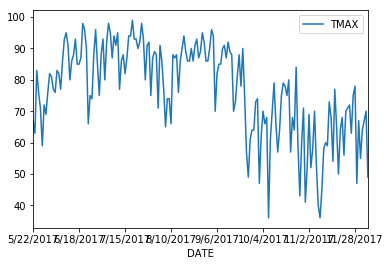

In [113]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/weather-example.csv')
df.plot(x='DATE', y='TMAX')

## Rolling means

Column:

```
df.columnName.rolling(window, min_periods=None, on=None, axis=0, closed=None).mean()
```

In [26]:
df['TMAX'].rolling(window=7).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6      70.142857
7      70.428571
8      72.285714
9      72.142857
10     72.857143
11     73.714286
12     76.142857
13     77.714286
14     79.571429
15     79.714286
16     80.285714
17     82.000000
18     84.571429
19     86.714286
20     86.285714
21     86.857143
22     88.428571
23     89.428571
24     88.285714
25     86.857143
26     86.285714
27     88.857143
28     90.285714
29     90.571429
         ...    
153    59.000000
154    56.428571
155    56.285714
156    54.000000
157    50.571429
158    51.428571
159    51.714286
160    50.142857
161    53.000000
162    57.000000
163    59.571429
164    64.142857
165    65.142857
166    63.714286
167    64.428571
168    63.714286
169    62.000000
170    64.285714
171    63.428571
172    64.428571
173    66.285714
174    67.857143
175    69.285714
176    68.000000
177    67.571429
178    65.285714
179    64.142857
180    64.7142

Easier to compare as a new column of the DataFrame:

In [29]:
df['rolling_max'] = df.TMAX.rolling(window=7).mean()
df.head(10)

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,rolling_mean
0,USC00052228,"DENVER MUSEUM, CO US",5/22/2017,0.08,0.0,0.0,67,42,42,NaN
1,USC00052228,"DENVER MUSEUM, CO US",5/23/2017,0.00,0.0,0.0,63,39,48,NaN
2,USC00052228,"DENVER MUSEUM, CO US",5/24/2017,0.00,0.0,0.0,83,40,62,NaN
3,USC00052228,"DENVER MUSEUM, CO US",5/25/2017,0.03,0.0,0.0,76,51,52,NaN
4,USC00052228,"DENVER MUSEUM, CO US",5/26/2017,0.37,0.0,0.0,71,42,51,NaN
5,USC00052228,"DENVER MUSEUM, CO US",5/27/2017,0.17,0.0,0.0,59,46,47,NaN
6,USC00052228,"DENVER MUSEUM, CO US",5/28/2017,0.00,0.0,0.0,72,43,53,70.142857
7,USC00052228,"DENVER MUSEUM, CO US",5/29/2017,0.00,0.0,0.0,69,47,53,70.428571
8,USC00052228,"DENVER MUSEUM, CO US",5/30/2017,0.03,0.0,0.0,76,47,56,72.285714
9,USC00052228,"DENVER MUSEUM, CO US",5/31/2017,0.00,0.0,0.0,82,48,61,72.142857


In [32]:
df['rolling_max'] = df.TMAX.rolling(window=7, min_periods=1).mean()
df.head(15)

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,rolling_mean,rolling_max
0,USC00052228,"DENVER MUSEUM, CO US",5/22/2017,0.08,0.0,0.0,67,42,42,NaN,67.000000
1,USC00052228,"DENVER MUSEUM, CO US",5/23/2017,0.00,0.0,0.0,63,39,48,NaN,65.000000
2,USC00052228,"DENVER MUSEUM, CO US",5/24/2017,0.00,0.0,0.0,83,40,62,NaN,71.000000
3,USC00052228,"DENVER MUSEUM, CO US",5/25/2017,0.03,0.0,0.0,76,51,52,NaN,72.250000
4,USC00052228,"DENVER MUSEUM, CO US",5/26/2017,0.37,0.0,0.0,71,42,51,NaN,72.000000
5,USC00052228,"DENVER MUSEUM, CO US",5/27/2017,0.17,0.0,0.0,59,46,47,NaN,69.833333
6,USC00052228,"DENVER MUSEUM, CO US",5/28/2017,0.00,0.0,0.0,72,43,53,70.142857,70.142857
7,USC00052228,"DENVER MUSEUM, CO US",5/29/2017,0.00,0.0,0.0,69,47,53,70.428571,70.428571
8,USC00052228,"DENVER MUSEUM, CO US",5/30/2017,0.03,0.0,0.0,76,47,56,72.285714,72.285714
9,USC00052228,"DENVER MUSEUM, CO US",5/31/2017,0.00,0.0,0.0,82,48,61,72.142857,72.142857


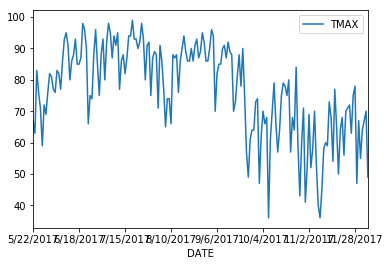

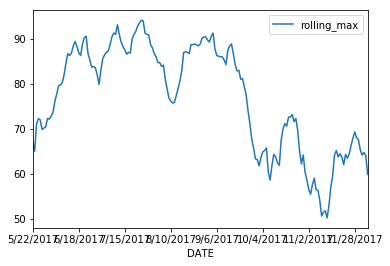

In [33]:
df.plot(x='DATE', y='TMAX')
df.plot(x='DATE', y='rolling_max')

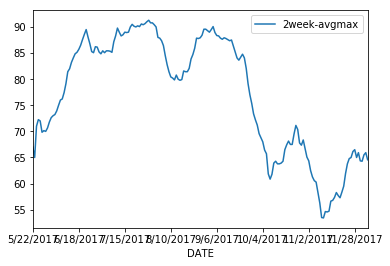

In [34]:
df['2week-avgmax'] = df.TMAX.rolling(window=7*2, min_periods=1).mean()
df.plot(x='DATE', y='2week-avgmax')

## Data types

Pandas tries to figure out the datatype automatically: integer, float, string, object (i.e. mix of various), boolean.

In [35]:
df.dtypes

STATION          object
NAME             object
DATE             object
PRCP            float64
SNOW            float64
SNWD            float64
TMAX              int64
TMIN              int64
TOBS              int64
rolling_mean    float64
rolling_max     float64
2week-avgmax    float64
dtype: object

## Working with dates and time

The 'Date' column is not recognized as dates. Convert it with `pd.to_datetime(column)` -- Then Pandas can work more smartly.

Here's some fake data, with 5 data points from May and 5 from July:

         DATE  TMAX
3   5/25/2017    76
4   5/26/2017    71
40   7/4/2017    92
41   7/5/2017    98


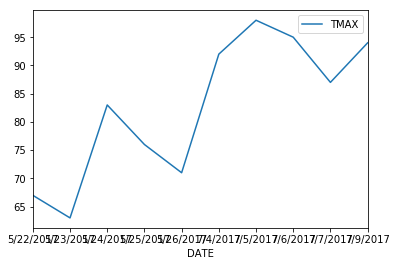

In [114]:
fake_data = pd.concat([df[0:5], df[40:45]])
print(fake_data[['DATE', 'TMAX']][3:7])
fake_data.plot(x='DATE', y='TMAX')

#### Problem: *Since Pandas doesn't realize that 'DATE' is a date column, it doesn't show the proper spacing between 5/26 and 7/4*

In [115]:
pd.to_datetime(df['DATE'])

0     2017-05-22
1     2017-05-23
2     2017-05-24
3     2017-05-25
4     2017-05-26
5     2017-05-27
6     2017-05-28
7     2017-05-29
8     2017-05-30
9     2017-05-31
10    2017-06-01
11    2017-06-02
12    2017-06-03
13    2017-06-04
14    2017-06-05
15    2017-06-06
16    2017-06-08
17    2017-06-09
18    2017-06-10
19    2017-06-12
20    2017-06-13
21    2017-06-14
22    2017-06-15
23    2017-06-16
24    2017-06-17
25    2017-06-18
26    2017-06-19
27    2017-06-20
28    2017-06-21
29    2017-06-22
         ...    
153   2017-11-05
154   2017-11-06
155   2017-11-07
156   2017-11-08
157   2017-11-10
158   2017-11-11
159   2017-11-12
160   2017-11-13
161   2017-11-14
162   2017-11-15
163   2017-11-16
164   2017-11-17
165   2017-11-18
166   2017-11-19
167   2017-11-20
168   2017-11-21
169   2017-11-22
170   2017-11-23
171   2017-11-24
172   2017-11-25
173   2017-11-26
174   2017-11-27
175   2017-11-28
176   2017-11-29
177   2017-11-30
178   2017-12-01
179   2017-12-02
180   2017-12-

Set it to a new column, or overwrite the existing column. Here, I'm setting to 'new_date' for clarity.

In [118]:
df['new_date'] = pd.to_datetime(df.DATE)
df.head(2)

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,new_date
0,USC00052228,"DENVER MUSEUM, CO US",5/22/2017,0.08,0.0,0.0,67,42,42,2017-05-22
1,USC00052228,"DENVER MUSEUM, CO US",5/23/2017,0.00,0.0,0.0,63,39,48,2017-05-23


In [116]:
df.dtypes

STATION     object
NAME        object
DATE        object
PRCP       float64
SNOW       float64
SNWD       float64
TMAX         int64
TMIN         int64
TOBS         int64
dtype: object

         DATE   new_date  TMAX
3   5/25/2017 2017-05-25    76
4   5/26/2017 2017-05-26    71
40   7/4/2017 2017-07-04    92
41   7/5/2017 2017-07-05    98


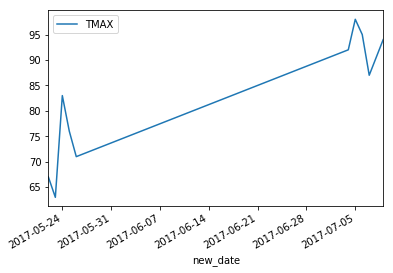

In [120]:
fake_data = pd.concat([df[0:5], df[40:45]])
print(fake_data[['DATE', 'new_date', 'TMAX']][3:7])
fake_data.plot(x='new_date', y='TMAX')

## Better!

With a proper date column:
    
- `rolling` will be more accurate, especially with less neat intervals than our weather data
  - e.g. `df.col1.rolling('2w')`, `df.col1.rolling('20m')`
- Can select substrings by date
  - e.g. return June 2017 - Sept 2017
- Proper intervals in plots
- Easy conversion of timezones
- Easy convert from datetime field to custom strings; by month, or year, or minute, etc.

Documentation: [Time Series / Date functionality](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)